# Week 10 Analysis

### How can we use comment length to judge the comments as useful?

The code below imports packages that we need for analysis:

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

The code below loads the datasets that we need to analyse the comments:

In [3]:
courses = pd.read_excel(r"C:\Users\safia\OneDrive\Documents\2020 SEMESTER 2\DATA3406\ass2\DATA3406-Assignment-2\data\C4Courses.xlsx")
comments = pd.read_excel(r"C:\Users\safia\OneDrive\Documents\2020 SEMESTER 2\DATA3406\ass2\DATA3406-Assignment-2\data\C4Comments.xlsx")
groups = pd.read_excel(r"C:\Users\safia\OneDrive\Documents\2020 SEMESTER 2\DATA3406\ass2\DATA3406-Assignment-2\data\C4UsersCourses.xlsx")
questions = pd.read_excel(r"C:\Users\safia\OneDrive\Documents\2020 SEMESTER 2\DATA3406\ass2\DATA3406-Assignment-2\data\C4Questions.xlsx")
comments.head()

,Comment_ID,course_id,Timestamp,user,Question_ID,Comment
0,7197674,21320,2020-04-30 19:57:28,635978,4470201,"This is a good question, i do think it's a lit..."
1,7197679,21320,2020-04-30 20:00:46,635978,4468999,"This is a really good question, i like the str..."
2,7199285,21320,2020-05-01 15:43:35,636026,4471345,It is a good question. Slightly tricky but not...
3,7202419,21320,2020-05-03 13:28:57,635990,4472540,I think this is a really good question! I thin...
4,7202425,21320,2020-05-03 13:34:57,635990,4472481,This question requires the students to recall ...


We can view the first 4 coloumns in the comments dataframe. the purpose of the code below is to find a criterion to judge useful comments we can determine the amount of words in each comment. 

In [33]:
comment_words = []
for i in comments['Comment']:
    comment_words.append(len(i.split(' ')))
comments['Words'] = comment_words

The code above uses a loop to go through each coloumn and finds out how many words are in each comment. Then we add a new coloumn to our comments dataframe. The code below is used to view the first few rows of the comments dataframe to ensure the new word coloumn was added.

In [50]:
comments.head()

,Comment_ID,course_id,Timestamp,user,Question_ID,Comment,Words
0,7197674,21320,2020-04-30 19:57:28,635978,4470201,"This is a good question, i do think it's a lit...",63
1,7197679,21320,2020-04-30 20:00:46,635978,4468999,"This is a really good question, i like the str...",20
2,7199285,21320,2020-05-01 15:43:35,636026,4471345,It is a good question. Slightly tricky but not...,13
3,7202419,21320,2020-05-03 13:28:57,635990,4472540,I think this is a really good question! I thin...,94
4,7202425,21320,2020-05-03 13:34:57,635990,4472481,This question requires the students to recall ...,82


As seen in the table above, we have added the new coliumn "Words". This is the amount of words in the "Comment".

Now we will merge the question and comment table. This will allow us to have the academic mark per question and its comments. Then we can also group by question ID. This will help us have a dataframe to be able to judge the influnce of comment words on question quality. 

In [51]:
question_comment_merge = questions[['id','user', 'AcademicMark', 'total_comments']].merge(comments[['user','Question_ID','Comment_ID','Comment','Words']], on='user', how='inner')
question_comment_merge= question_comment_merge.sort_values('AcademicMark', ascending = False)
question_comment_merge = question_comment_merge.dropna()
question_comment_merge.groupby('id').mean()

,user,AcademicMark,total_comments,Question_ID,Comment_ID,Words
id,,,,,,
4466727,636371.0,4.0,11.0,4.470502e+06,7.209537e+06,92.444444
4469118,636252.0,3.0,9.0,4.472727e+06,7.207523e+06,67.400000
4469218,639907.0,3.0,9.0,4.471930e+06,7.209150e+06,22.500000
4469893,560584.0,4.0,10.0,4.472836e+06,7.215156e+06,56.900000
4470054,636365.0,3.0,10.0,4.472207e+06,7.203616e+06,75.777778
...,...,...,...,...,...,...
4489374,637571.0,3.0,0.0,4.476444e+06,7.220676e+06,27.333333
4489504,637257.0,3.0,0.0,4.481382e+06,7.225110e+06,60.000000
4489506,637290.0,5.0,0.0,4.479634e+06,7.222408e+06,65.875000


We also removed rows with NaN values snd sorted the table by academic mark to make the the trends easier to analyse.

In the code below, we will compare total comments with academic mark. This is because we want to determine if there is somewhat of a correlation between question academic mark and total comments under that question.

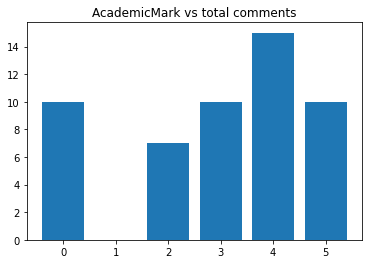

In [59]:
plt.bar(question_comment_merge['AcademicMark'],question_comment_merge['total_comments'])
plt.plot()
plt.title("AcademicMark vs total comments")
plt.show()

The bar graph above displays the academic mark vs total comments. We can see that questions are varied in terms of academic mark and total comments. This suggests that perhpas having greater amounts of comments is not as helpful as comments of good quality.

Below we will put total comments and academic mark in a scatter plot. These may help us observe any outliers, but also allow us to determine if there is no correlation between academic mark and total comments.

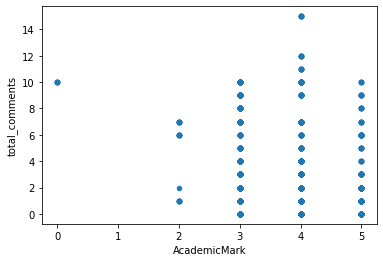

In [61]:
question_comment_merge.plot.scatter('AcademicMark', 'total_comments')

As seen in the scatter plot above, there is an outlier with 0 academic mark and 10 total comments. This can be dealt with later. It is clear that there is not much of a correlation here as the total comments are spread throughout the academic marks. This also suggests that the quality of a question is more important than the total.

Below is the code for creating a bar plot with academic mark against the number of words in each comment. The reason for doing this type of graph is to determine if the a higher word count in the comments of questions influences the final academic mark of that question.

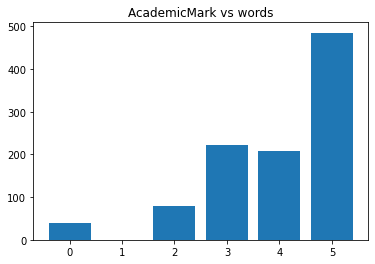

In [63]:
plt.bar(question_comment_merge['AcademicMark'],question_comment_merge['Words'])
plt.plot()
plt.title("AcademicMark vs words")
plt.show()

As seen in the bar plot above, it seems as though having a higher number of words in the comments of questions can increase the academic mark as questions with marks in the 0-2 range do not have high word counts relative to the 3-5 mark range. This suggests that the quality of a comment may come from the length of the comment.

To check if there are any major outliers we can do a scatter plot on academic mark and words. This scatter plot is coded below and will also assist us in determining if there is a correlation between academic mark and comment words.

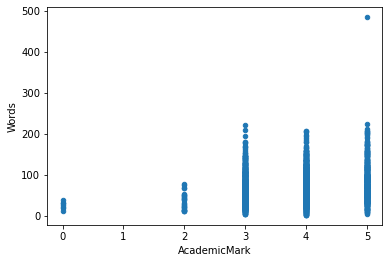

In [47]:
question_comment_merge.plot.scatter('AcademicMark', 'Words')

As seen above, there is an outlier in academic mark 5 with a comment with a word count of 500. In reality length of comments only seperate marks from 0-2 and 3-5. Once you are in the 3-5 mark range there must be another indicator that helps push the mark up that still needs to be investigated. The number of words is most impactful in the 0-2 range as they have less words per comment.